# Part II Ford GoBike SlideDeck
## by HaoNM


## Investigation Overview


> In this investigation, I wanted to focus on the following questions: when are most trips taken in terms of time of day, day of week and month of the year. How long does the average trip take? Does the above depend on if a user is a subscriber or customer?


## Dataset Overview

> At this session, i will download data of ford go bike system from 1-2019 -> 12->2019 to analyze it. Ford GoBike is the Bay Area's bike share.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import StrMethodFormatter
from matplotlib import rcParams

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df_cp = pd.read_csv('cleaned_dataset.csv', low_memory=False)

In [12]:
# Set the figure size base
rcParams['figure.figsize'] = 12, 8
# Limit data frame by duration sec 
litmit_frame = df_cp.query('duration_sec < 6000')

## Distribution of trip durations

> After analyzing and removing unnecessary data, I found the peak travel time was around 550s and confirmed that the trips were mostly short trips.

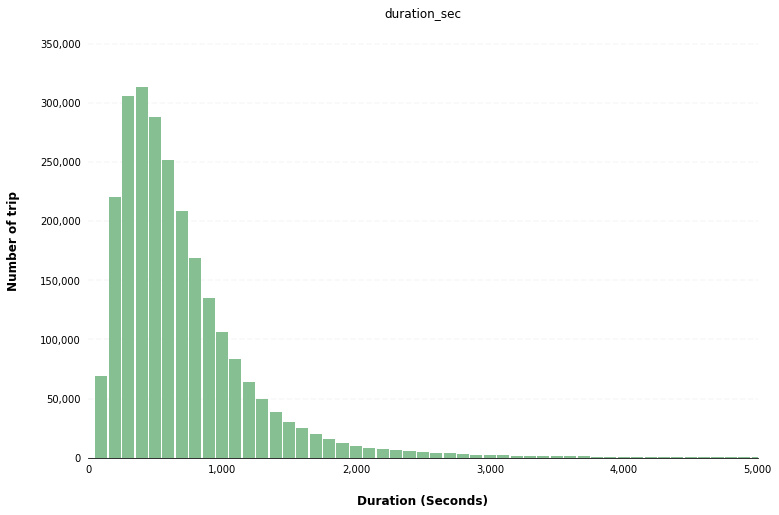

In [9]:
# Because very hard to see , so i limited duration_sec to 5000 seconds and re-draw chart
# Each column in the chart represents 100 units
chart = df_cp.hist(column='duration_sec', bins=np.arange(50, df_cp.duration_sec.max(), 100), grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

chart = chart[0]
for x in chart:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of trip", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    # Limit range x
    x.set_xlim(0, 5000)


## Distribution of User Types

* See the chart user_type, customer user ~ 50k , subscriber user ~ 200k. The number of users using subscribers is 4 times higher than customers

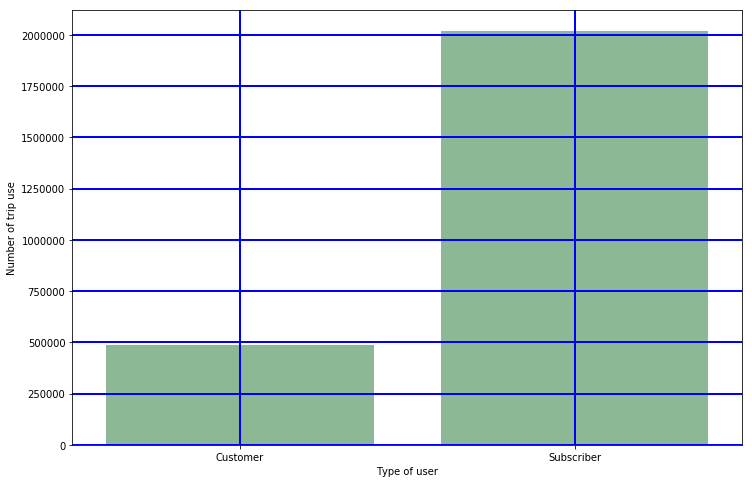

In [14]:
sb.countplot(data=df_cp, x='user_type', color='#86bf91')
plt.xlabel('Type of user')
plt.ylabel('Number of trip use')
plt.grid(color='blue', linestyle='-', linewidth=2)

## Average Ride Duration: Subscribers vs. Customers

* Although subscribers make a lot more trips than customers, customers generally take longer bike trip than subscribers.

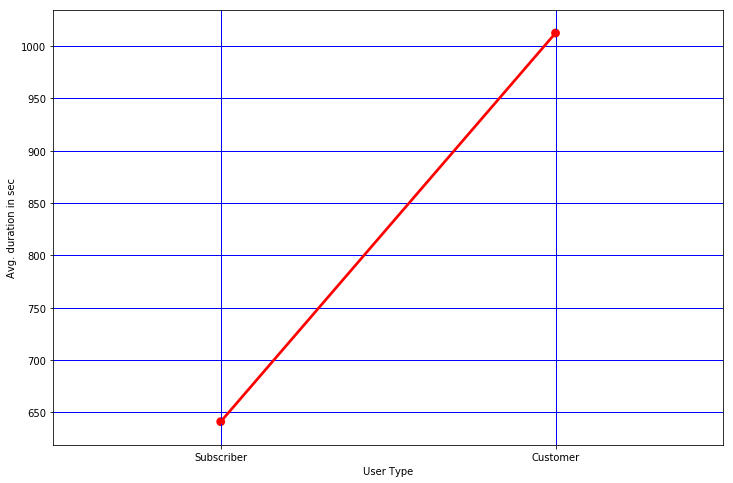

In [15]:
# Chart duration sec by user type
sb.pointplot(data = litmit_frame, x = 'user_type', y = 'duration_sec', color = 'red')
plt.xlabel('User Type')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.show()

## Bike Usage in Hour/Day/Month: Subscribers vs. Customers

Some key as follows:

* AVG duration for customers are longer than subscribers. Average duration for customers are higher between 10am-5pm reaching its peak at 2pm.
* Daily avg. trip duration for customers are longer than subscribers. Both subscribers and customers take longer trips during weekend than weekdays.
* Monthly avg. trip duration for customers are longer than subscribers. Monthly average duration for subscribers looks stable during the year. The average duration for customers peaks at March and bottom at December.The average duration for subscribe peaks at July and bottom at February.

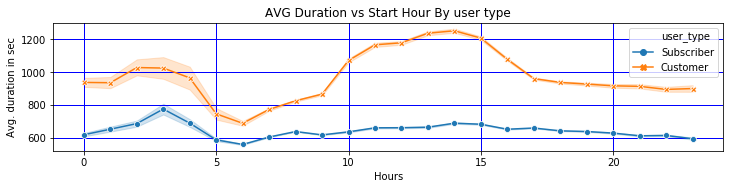

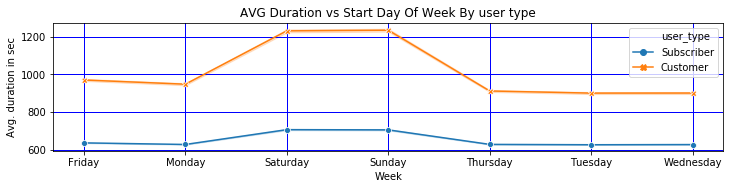

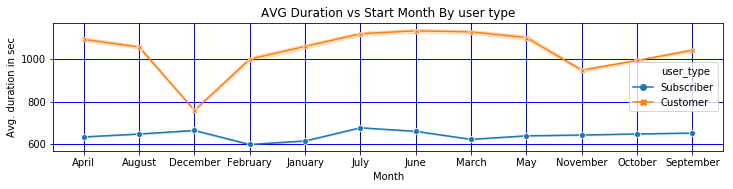

In [17]:
# Draw chart duration sec vs hour, week, month
plt.subplot(3, 1, 1)
sb.lineplot(data = litmit_frame, x = 'start_hourofday', y = 'duration_sec', color = 'red', hue="user_type", style="user_type",
    markers=True, dashes=False)
plt.xlabel('Hours')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.title('AVG Duration vs Start Hour By user type')
plt.show()

plt.subplot(3, 1, 2)
sb.lineplot(data = litmit_frame, x = 'start_dayofweek', y = 'duration_sec', color = 'red', hue="user_type", style="user_type",
    markers=True, dashes=False)
plt.xlabel('Week')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.title('AVG Duration vs Start Day Of Week By user type')
plt.show()

plt.subplot(3, 1, 3)
sb.lineplot(data = litmit_frame, x = 'start_month', y = 'duration_sec', color = 'red', hue="user_type", style="user_type",
    markers=True, dashes=False)
plt.xlabel('Month')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.title('AVG Duration vs Start Month By user type')
plt.show()

## Bike Rides 24x7: Subscribers vs. Customers
* Subscribers have a preference for frequent bike usage during weekdays, particularly in the mornings and evenings. Conversely, customers tend to use bikes more often during the weekends shown by the histogram in bold red around the 6th and 7th day ranges between 10 - 15 pm.

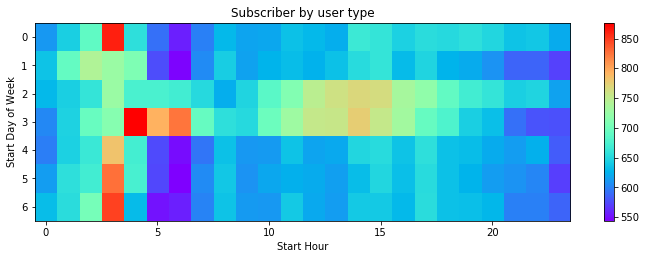

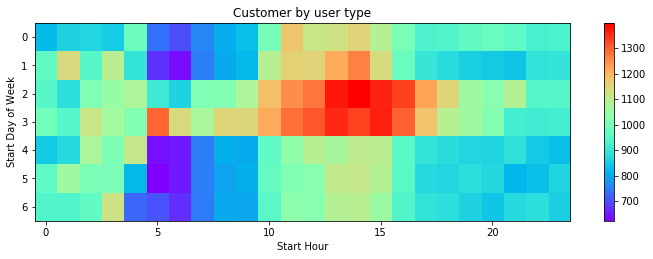

In [18]:
plt.subplot(2, 1, 1)
subscriber_duration_means = litmit_frame.query('user_type == "Subscriber"').groupby(['start_dayofweek', 
                                                                           'start_hourofday']).mean().astype(int)['duration_sec']
#Convert to matrix 2D
subscriber_matrix = subscriber_duration_means.unstack()
# Draw type chart is imshow 
plt.imshow(subscriber_matrix, cmap='rainbow', aspect='auto')
plt.xlabel('Start Hour')
plt.ylabel('Start Day of Week')
plt.title('Subscriber by user type')
plt.colorbar()
plt.show()

plt.subplot(2, 1, 2)
customer_duration_means = litmit_frame.query('user_type == "Customer"').groupby(['start_dayofweek', 
                                                                           'start_hourofday']).mean().astype(int)['duration_sec']
#Convert to matrix 2D
customer_matrix = customer_duration_means.unstack()
# Draw type chart is imshow 
plt.imshow(customer_matrix, cmap='rainbow', aspect='auto')
plt.xlabel('Start Hour')
plt.ylabel('Start Day of Week')
plt.title('Customer by user type')
plt.colorbar()
plt.show()